# **Predição de Doença Cardiovascular**

Integrantes do grupo:
* Alexandre Zamora Zerbini Denigres
* Lucas Vinícius Santos De Lima
* Rayssa R. Oliveira De Faria
* Thiago Manata Michaelsen

<br>


[Link do dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## 1. Introdução e objetivos

A doença cardíaca é uma das principais causas de morbidade e mortalidade em todo o mundo. A capacidade de prever eventos cardíacos, como insuficiência cardíaca, pode ser crucial para a intervenção médica oportuna e eficaz. Nesse contexto, a utilização de técnicas avançadas de Machine Learning torna-se fundamental para analisar dados complexos e identificar padrões que possam auxiliar na previsão de problemas cardíacos. O objetivo principal deste projeto é desenvolver um modelo de Machine Learning capaz de prever a ocorrência de insuficiência cardíaca em pacientes com base em várias variáveis de entrada. Ao analisar dados demográficos, indicadores fisiológicos e resultados de testes cardíacos, pretendemos criar um modelo preditivo robusto que possa servir de alerta aos médicos sobre os pacientes com maior risco de desenvolver insuficiência cardíaca.

## 2. Análise exploratória

In [ ]:
# Importação das bibliotecas principais

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# from scipy.stats import skew

import sklearn.datasets as skdata

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

from google.colab import files

In [ ]:
# Importação das credenciais do Kaggle (arquivo 'kaggle.json')

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tmmichaelsen","key":"be6619f800dcb1395662ae8e23567f81"}'}

In [ ]:
# Instalação da biblioteca do Kaggle:
!pip install -q kaggle

# Configurações para utilização do arquivo 'kaggle.json':
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download do zip contendo as bases de dados:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

# Extração do zip:
!unzip heart-failure-prediction.zip

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 13.5MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Proporção dos dados da base

In [ ]:
df["HeartDisease"].value_counts(normalize = True)

1   0.55
0   0.45
Name: HeartDisease, dtype: float64

In [ ]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Correlações

In [ ]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df2 = pd.get_dummies(df, columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.00,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.00,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.00,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.50,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.00,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.20,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.40,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.20,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.00,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df.corr(method = "spearman", numeric_only = True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.28,-0.05,0.20,-0.37,0.30,0.29
RestingBP,0.28,1.00,0.11,0.07,-0.11,0.18,0.11
Cholesterol,-0.05,0.11,1.00,-0.19,0.18,0.05,-0.14
FastingBS,0.20,0.07,-0.19,1.00,-0.12,0.10,0.27
MaxHR,-0.37,-0.11,0.18,-0.12,1.00,-0.21,-0.40
Oldpeak,0.30,0.18,0.05,0.10,-0.21,1.00,0.42
HeartDisease,0.29,0.11,-0.14,0.27,-0.40,0.42,1.00


In [ ]:
df2.corr(method = 'spearman', numeric_only = True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.00,0.28,-0.05,0.20,-0.37,0.30,0.29,-0.06,0.06,0.17,...,-0.03,0.05,0.15,-0.24,0.14,-0.22,0.22,0.14,0.19,-0.26
RestingBP,0.28,1.00,0.11,0.07,-0.11,0.18,0.11,-0.03,0.03,0.05,...,-0.03,0.06,0.04,-0.11,0.09,-0.16,0.16,-0.02,0.11,-0.10
Cholesterol,-0.05,0.11,1.00,-0.19,0.18,0.05,-0.14,0.18,-0.18,-0.07,...,-0.04,0.01,0.18,-0.06,-0.11,-0.02,0.02,-0.06,-0.01,0.05
FastingBS,0.20,0.07,-0.19,1.00,-0.12,0.10,0.27,-0.12,0.12,0.13,...,-0.04,0.03,-0.01,-0.09,0.13,-0.06,0.06,0.11,0.11,-0.16
MaxHR,-0.37,-0.11,0.18,-0.12,1.00,-0.21,-0.40,0.20,-0.20,-0.36,...,0.14,0.10,0.12,0.03,-0.17,0.39,-0.39,-0.08,-0.34,0.39
Oldpeak,0.30,0.18,0.05,0.10,-0.21,1.00,0.42,-0.12,0.12,0.30,...,-0.10,0.04,0.08,-0.12,0.06,-0.44,0.44,0.27,0.35,-0.49
HeartDisease,0.29,0.11,-0.14,0.27,-0.40,0.42,1.00,-0.31,0.31,0.52,...,-0.21,-0.05,0.01,-0.09,0.10,-0.49,0.49,0.12,0.55,-0.62
Sex_F,-0.06,-0.03,0.18,-0.12,0.20,-0.12,-0.31,1.00,-1.00,-0.18,...,0.07,0.00,0.05,0.01,-0.06,0.19,-0.19,-0.07,-0.12,0.15
Sex_M,0.06,0.03,-0.18,0.12,-0.20,0.12,0.31,-1.00,1.00,0.18,...,-0.07,-0.00,-0.05,-0.01,0.06,-0.19,0.19,0.07,0.12,-0.15
ChestPainType_ASY,0.17,0.05,-0.07,0.13,-0.36,0.30,0.52,-0.18,0.18,1.00,...,-0.58,-0.25,0.00,-0.06,0.08,-0.43,0.43,0.10,0.30,-0.36


<Axes: >

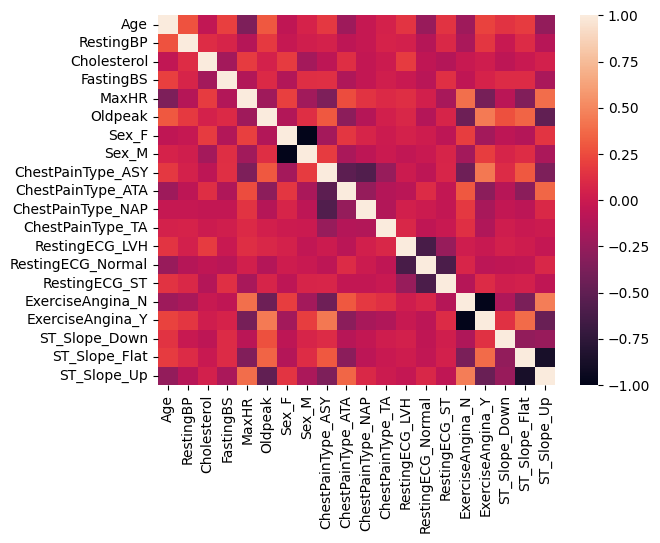

In [ ]:
sns.heatmap(df2.drop(columns = "HeartDisease").corr(method = 'spearman', numeric_only = True))

<Axes: xlabel='Age', ylabel='Density'>

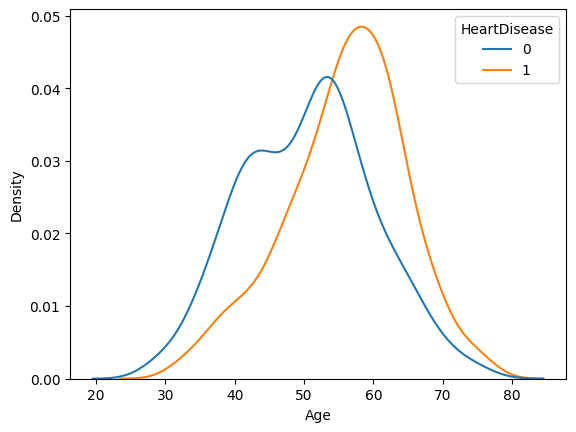

In [ ]:
sns.kdeplot(
    data = df,
    x = "Age",
    hue = "HeartDisease",
    common_norm = False
)

<Axes: xlabel='MaxHR', ylabel='Density'>

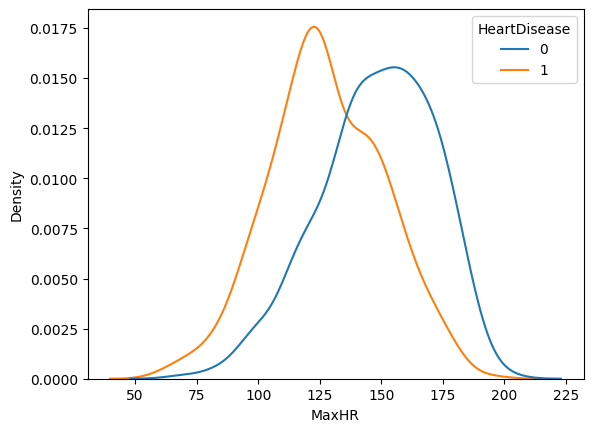

In [ ]:
sns.kdeplot(
    data = df,
    x = "MaxHR",
    hue = "HeartDisease",
    common_norm = False
)

<Axes: xlabel='ST_Slope_Flat', ylabel='Count'>

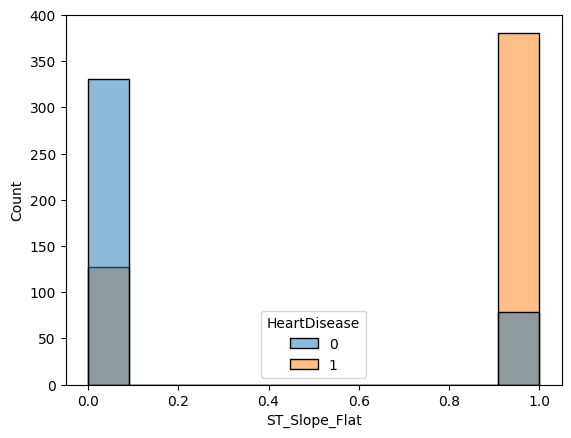

In [ ]:
sns.histplot(
    data = df2,
    x = "ST_Slope_Flat",
    hue = "HeartDisease"
)

### Perguntas

#### Quais são os principais fatores de risco associados à insuficiência cardíaca?

<Axes: >

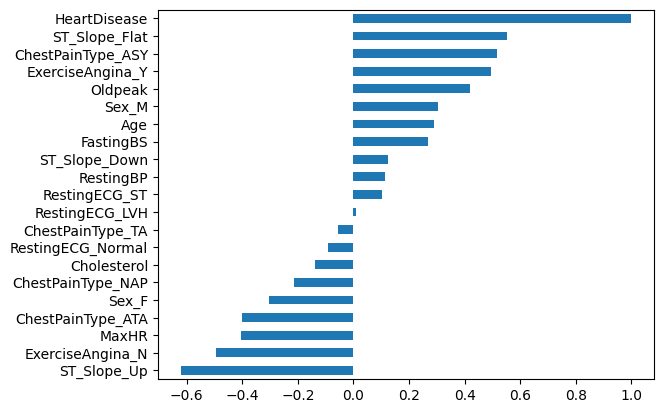

In [ ]:
df2.corr(method = "spearman", numeric_only = True)["HeartDisease"].sort_values().plot(kind = 'barh')

##### Interpretando os resultados:

**Inclinação do segmento ST** (*ST_Slope*): de acordo com a literatura médica, durante a condição de exercício é esperada uma inclinação acentuadamente positiva no segmento ST ([artigo de referência](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/#:~:text=Normal%20trace%20during%20exercise,exercise%20therefore%20slopes%20sharply%20upwards.)), sendo coerente uma alta correlação positiva com a doença cardíaca na presença da inclinação horizontal (*flat*).

**Depressão do segmento ST induzida por exercício** (*Oldpeak*): a depressão do segmento ST tem uma forte correlação positiva com a ocorrência de insuficiência cardíaca.

**Idade** (*Age*): a idade do paciente também está correlacionada positivamente, o que é comum em problemas cardíacos.

**Açúcar sanguíneo em jejum** (*FastingBS*): o nível de açúcar no sangue em jejum está correlacionado positivamente, indicando uma possível influência do diabetes na insuficiência cardíaca.

**Pessão arterial em repouso** (*RestingBP*): a pressão arterial em repouso tem uma correlação positiva, mas é menos forte em comparação com outras variáveis.

**Frequência cardíaca máxima** (*MaxHR*): a frequência cardíaca máxima atingida tem uma correlação negativa com a insuficiência cardíaca.

<br>

Obs:* A depressão do segmento ST é um padrão observado em um eletrocardiograma (ECG ou EKG) que indica uma possível falta de oxigênio no músculo cardíaco (isquemia). O segmento ST é uma parte do traçado do ECG que conecta a porção final da onda P (representando a despolarização dos átrios) à parte inicial da onda T (representando a repolarização ventricular). Em uma situação normal, o segmento ST deve estar no mesmo nível da linha de base (linha isoeletrônica) do ECG. No entanto, a depressão do segmento ST ocorre quando esse segmento é deslocado abaixo da linha de base. Isso geralmente é indicativo de um problema cardíaco, especialmente quando ocorre durante ou após o exercício, o que sugere isquemia induzida pelo esforço.

#### Como o sexo dos pacientes influencia na ocorrência de insuficiência cardíaca?

In [ ]:
gender_heart_disease_counts = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True).unstack()
print("Influência do sexo na ocorrência de insuficiência cardíaca:")
print(gender_heart_disease_counts)

Influência do sexo na ocorrência de insuficiência cardíaca:
HeartDisease    0    1
Sex                   
F            0.74 0.26
M            0.37 0.63


##### Interpretando os resultados:

**Mulheres (F)**: Cerca de 74% das mulheres no dataset não têm insuficiência cardíaca, enquanto aproximadamente 26% delas têm insuficiência cardíaca.

**Homens (M)**: No caso dos homens, aproximadamente 37% deles não têm insuficiência cardíaca, enquanto cerca de 63% têm insuficiência cardíaca.

Esses resultados indicam que, no dataset, as mulheres têm uma taxa de ocorrência de insuficiência cardíaca menor em comparação com os homens, onde os homens têm uma probabilidade significativamente maior de desenvolver insuficiência cardíaca.

#### Qual é o impacto do tipo de dor no peito na previsão da insuficiência cardíaca?

In [ ]:
chest_pain_heart_disease_counts = df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack()
print("Impacto do tipo de dor no peito na ocorrência de insuficiência cardíaca:")
print(chest_pain_heart_disease_counts)

Impacto do tipo de dor no peito na ocorrência de insuficiência cardíaca:
HeartDisease     0    1
ChestPainType          
ASY           0.21 0.79
ATA           0.86 0.14
NAP           0.65 0.35
TA            0.57 0.43


##### Interpretando os resultados:

**ASY (Asymptomatic)**: Pacientes com dor no peito assintomática têm uma probabilidade alta (aproximadamente 79%) de ter insuficiência cardíaca.

**ATA (Atypical Angina)**: Pacientes com dor no peito atípica têm uma probabilidade relativamente baixa (aproximadamente 14%) de ter insuficiência cardíaca.

**NAP (Non-Anginal Pain)**: Pacientes com dor no peito não anginal têm uma probabilidade moderada (aproximadamente 35%) de ter insuficiência cardíaca.

**TA (Typical Angina)**: Pacientes com dor no peito típica têm uma probabilidade intermediária (aproximadamente 43%) de ter insuficiência cardíaca.

Esses resultados indicam que, no conjunto de dados, a presença de dor no peito assintomática (ASY) está fortemente associada à insuficiência cardíaca, enquanto a dor no peito atípica (ATA) tem uma associação muito mais fraca com a insuficiência cardíaca. A dor no peito não anginal (NAP) e a dor no peito típica (TA) têm associações de intensidade moderada com a insuficiência cardíaca.

Obs:

- Asymptomatic (ASY - Assintomática):

Este termo indica que o paciente não apresenta sintomas perceptíveis ou desconforto no peito. Eles não sentem dor ou pressão no peito, mesmo que estejam em risco de doença cardíaca.

- Atypical Angina (ATA - Angina Atípica):

A angina é uma dor ou desconforto no peito causado por falta de suprimento sanguíneo adequado ao músculo cardíaco. A angina atípica refere-se a padrões de dor no peito que não são típicos dos sintomas clássicos de angina. Isso pode incluir sensações de queimação, pressão ou desconforto em áreas diferentes do peito, ou mesmo dor que irradia para os ombros, pescoço, mandíbula ou costas.

- Non-Anginal Pain (NAP - Dor Não Anginal):

Este termo refere-se a dor no peito que não é causada por angina. Pode haver desconforto no peito, mas não está relacionado a problemas no fluxo sanguíneo para o coração. Isso pode incluir outras condições, como problemas gastrointestinais, músculo-esqueléticos ou ansiedade, que podem causar dor no peito sem envolver o coração.

- Typical Angina (TA - Angina Típica):

A angina típica é a forma clássica de angina, caracterizada por uma sensação opressiva, aperto, peso ou queimação no peito. Essa dor é geralmente desencadeada pelo esforço físico ou estresse emocional e alivia com o descanso ou medicamentos específicos, como a nitroglicerina.

#### Como os níveis de colesterol estão correlacionados com a insuficiência cardíaca?

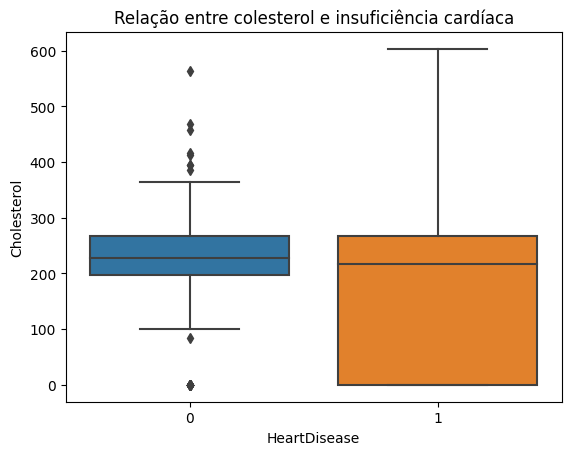

In [ ]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Relação entre colesterol e insuficiência cardíaca")
plt.show()

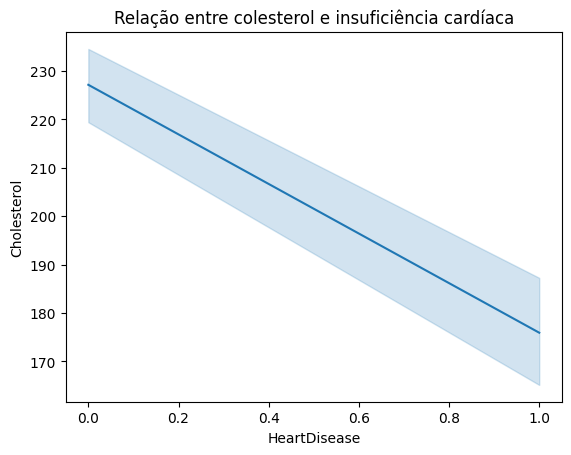

In [ ]:
sns.lineplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Relação entre colesterol e insuficiência cardíaca")
plt.show()

#### O diabetes (indicado pelo nível de açúcar no sangue em jejum) é um fator significativo?

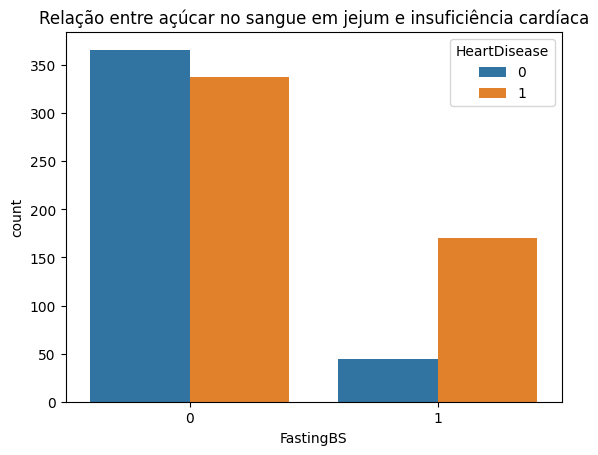

In [ ]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)
plt.title("Relação entre açúcar no sangue em jejum e insuficiência cardíaca")
plt.show()

##### Interpretando os resultados:

A partir do gráfico gerado nota-se uma diferença significativa na presença de doenças cardíacas entre pessoas com níveis de açucar indicadores de diabetes (par de colunas 1). O que mostra que o diabetes está fortemente ligado à insufiência cardíaca.

#### Existe uma correlação entre a depressão do segmento ST e a gravidade da insuficiência cardíaca?

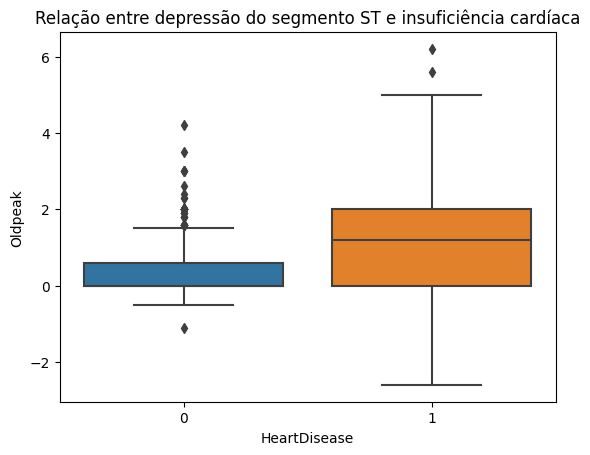

In [ ]:
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title("Relação entre depressão do segmento ST e insuficiência cardíaca")
plt.show()

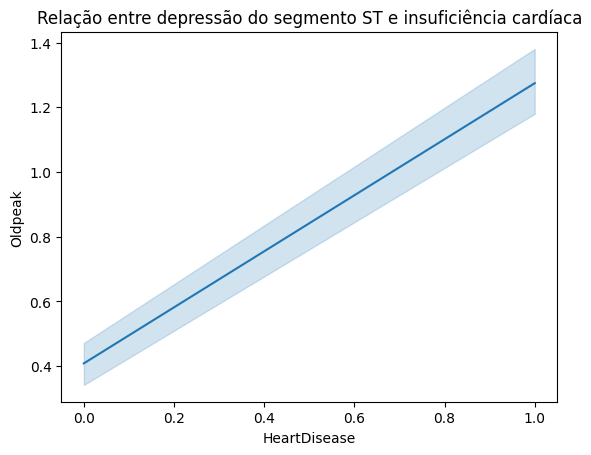

In [ ]:
sns.lineplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title("Relação entre depressão do segmento ST e insuficiência cardíaca")
plt.show()

#### Como os resultados do eletrocardiograma em repouso estão associados à presença de insuficiência cardíaca?

In [ ]:
resting_ecg_heart_disease_counts = df.groupby('RestingECG')['HeartDisease'].value_counts(normalize=True).unstack()
print("Relação entre resultados do eletrocardiograma em repouso e insuficiência cardíaca:")
print(resting_ecg_heart_disease_counts)

Relação entre resultados do eletrocardiograma em repouso e insuficiência cardíaca:
HeartDisease    0    1
RestingECG            
LVH          0.44 0.56
Normal       0.48 0.52
ST           0.34 0.66


##### Interpretando os resultados:

**LVH** (Left Ventricular Hypertrophy - Hipertrofia Ventricular Esquerda): Pacientes com hipertrofia ventricular esquerda têm uma probabilidade de aproximadamente 56% de ter insuficiência cardíaca, indicando uma associação significativa entre a hipertrofia ventricular esquerda e a insuficiência cardíaca.

**Normal**: Pacientes com resultados normais no ECG têm uma probabilidade de aproximadamente 52% de ter insuficiência cardíaca. Isso indica que, mesmo com um ECG normal, ainda há uma chance moderada de insuficiência cardíaca.

**ST** (ST-T wave abnormality - Anormalidade da Onda ST-T): Pacientes com anormalidades na onda ST-T têm uma probabilidade de aproximadamente 66% de ter insuficiência cardíaca, indicando uma associação mais forte entre essas anormalidades no ECG e a insuficiência cardíaca.

### Sumário da Análise Exploratória


**Parâmetros Numéricos**
*   Age: Min = 28, Max = 77, Mean = 53.51;
*   RestingBP: Min = 0, Max = 200, Mean = 132.40;
*   Cholesterol: Min = 0, Max = 603, Mean = 198.80;
*   MaxHR: Min = 60, Max = 202, Mean = 136.81;
*   Oldpeak: Min = -2.60, Max = +6.20, Mean = +1.07.

**Parâmetros Categóricos**
*   Sex: Male (78.98%) > Female (21.02%);
*   ChestPainType: ASY (54.03%) > NAP (22.11%) > ATA (18.85%) > TA (5.01%);
*   FastingBS: False (76.69%) > True (23.31%);
*   Resting ECG: Normal (60.13%) > LVH (20.48%) > ST (19.39%);
*   ExerciseAngina: False (59.59%) > True (40.41%);
*   ST_Slope: Flat (50.11%) > Up (43.03%) > Down (6.86%);
*   HeartDisease: True () > False ().



## 3. Modelagem

### Definições das bases de modelagem

In [ ]:
# Importação das bibliotecas

# Divisão da base
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Modelos de Classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas de elaboração de Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Bibliotecas de métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, classification_report

In [ ]:
# Separando as features (X) e o target (y):
X = df2.drop(columns = "HeartDisease")
y = df2["HeartDisease"]

In [ ]:
# Divisão da base em Treinamento e Teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify = y)

In [ ]:
y_train.value_counts(normalize = True)

1   0.55
0   0.45
Name: HeartDisease, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

1   0.55
0   0.45
Name: HeartDisease, dtype: float64

Verificamos após divisão das bases de treinamento e teste que elas possuem a mesma distribuição de valores para probabilidades de doenças cardíacas

In [ ]:
dfr = pd.DataFrame(columns=['Model', 'Precision', 'Accuracy', 'Recall', 'F1 Score', 'ROC AUC'])

### K-Nearest Neighbors

#### Ajuste do Pipeline

In [ ]:
# Criação de um Pipeline:

lista_etapas = [("std_scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

In [ ]:
pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())])

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Ajuste fino de hiperparâmetros do KNN com GridSearch


In [ ]:
# Grid Search:

grid_knn_class = GridSearchCV(
    estimator = pipe, # algoritmo estimador
    param_grid = {
        "knn__n_neighbors": range(2,50),
        "knn__metric": ["euclidean", "manhattan"],
        "knn__weights": ["uniform", "distance"]
    }, # parâmetros do grid
    scoring = "neg_mean_absolute_error", # métrica de pontuação
    cv = KFold(n_splits = 10, shuffle = True, random_state = 4), # validação cruzada
    verbose = 10 # verbosidade
)

grid_knn_class.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV 1/10; 1/192] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/192] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-0.189 total time=   0.1s
[CV 2/10; 1/192] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/192] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-0.203 total time=   0.0s
[CV 3/10; 1/192] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/192] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-0.095 total time=   0.1s
[CV 4/10; 1/192] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/192] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=-0.189 total time=   0.1s
[CV 5/10; 1/192] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/192] END knn

GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(2, 50),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [ ]:
# Definição de função para impressão das métricas do modelo

def print_classification_metrics(y_test, y_pred):
    print("Métricas de avaliação: ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")

In [ ]:
# Avaliação com o GridSearch:

# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_knn_class.predict(X_train)
print_classification_metrics(y_train, y_pred_train)

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_knn_class.predict(X_test)
print_classification_metrics(y_test, y_pred_test)

==== Avaliação no conjunto de treinamento ====
Métricas de avaliação: 
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
ROC AUC: 1.00

==== Avaliação no conjunto de teste ====
Métricas de avaliação: 
Accuracy: 0.86
Precision: 0.87
Recall: 0.87
ROC AUC: 0.86


==== Avaliação no conjunto de treinamento ====


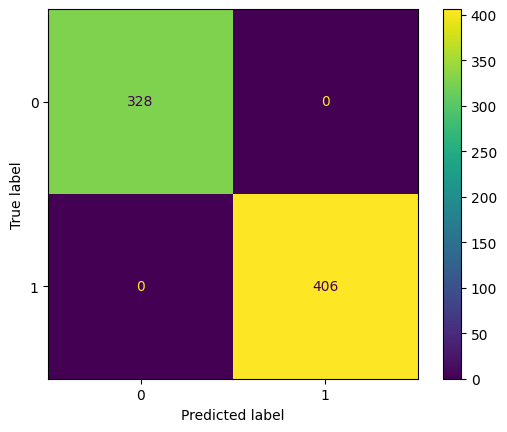

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734

ROC AUC: 1.00

==== Avaliação no conjunto de teste ====


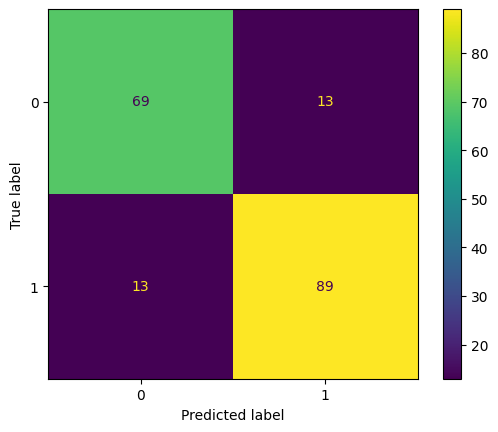

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC: 0.86


In [ ]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_knn_class.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))
print(f"ROC AUC: {roc_auc_score(y_train, y_pred_train):.2f}")

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_knn_class.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.2f}")

Através das métricas de avaliação do conjunto de treinamento, observa-se o overfitting do modelo KNN. Desta forma, torna-se necessária a avaliação dos parâmetros utilizados com maior impacto na base de dados.

In [ ]:
# Verificação dos parametros ordenado pelos modelos mais sobreajustados
dfy = pd.DataFrame(grid_knn_class.cv_results_)
dfy.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
169,0.01,0.00,0.01,0.00,manhattan,38,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.09,-0.12,...,-0.08,-0.18,-0.12,-0.15,-0.15,-0.14,-0.11,-0.12,0.04,1
171,0.01,0.00,0.01,0.01,manhattan,39,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.09,-0.12,...,-0.08,-0.16,-0.14,-0.15,-0.15,-0.14,-0.11,-0.12,0.04,1
175,0.01,0.00,0.04,0.04,manhattan,41,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.09,-0.12,...,-0.08,-0.16,-0.14,-0.15,-0.15,-0.14,-0.11,-0.12,0.04,1
173,0.01,0.00,0.05,0.05,manhattan,40,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.09,-0.12,...,-0.07,-0.18,-0.14,-0.15,-0.15,-0.14,-0.11,-0.12,0.04,4
191,0.01,0.00,0.01,0.00,manhattan,49,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.11,-0.12,...,-0.08,-0.18,-0.14,-0.16,-0.14,-0.14,-0.10,-0.12,0.04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.01,0.00,0.01,0.00,euclidean,6,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",-0.12,-0.16,...,-0.16,-0.16,-0.14,-0.19,-0.21,-0.21,-0.12,-0.15,0.04,188
97,0.01,0.00,0.01,0.00,manhattan,2,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.12,-0.23,...,-0.18,-0.15,-0.14,-0.18,-0.18,-0.19,-0.21,-0.17,0.03,189
1,0.01,0.00,0.00,0.00,euclidean,2,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",-0.16,-0.20,...,-0.18,-0.15,-0.16,-0.18,-0.18,-0.19,-0.23,-0.17,0.03,190
96,0.01,0.00,0.01,0.00,manhattan,2,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",-0.15,-0.23,...,-0.15,-0.21,-0.14,-0.18,-0.21,-0.25,-0.21,-0.18,0.04,191


In [ ]:
# Parametrização do Grid
grid_knn_class = GridSearchCV(
    estimator = pipe, # algoritmo estimador
    param_grid = {
        "knn__n_neighbors": range(2, 50),
        "knn__metric": ["euclidean", "manhattan"],
        "knn__weights": ["uniform"]
    }, # parâmetros do grid
    scoring = "f1", # métrica de pontuação
    cv = KFold(n_splits = 10, shuffle = True, random_state = 4), # validação cruzada
    verbose = 10 # verbosidade
)

# Fit do Grid para o modelo KNN
grid_knn_class.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV 1/10; 1/96] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/96] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.788 total time=   0.0s
[CV 2/10; 1/96] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/96] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.795 total time=   0.0s
[CV 3/10; 1/96] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/96] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.920 total time=   0.0s
[CV 4/10; 1/96] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/96] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.794 total time=   0.0s
[CV 5/10; 1/96] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/96] END knn__metric=euclide

GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(2, 50),
                         'knn__weights': ['uniform']},
             scoring='f1', verbose=10)

In [ ]:
# Avaliação com o GridSearch:

# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_knn_class.predict(X_train)
print_classification_metrics(y_train, y_pred_train)

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_knn_class.predict(X_test)
print_classification_metrics(y_test, y_pred_test)

==== Avaliação no conjunto de treinamento ====
Métricas de avaliação: 
Accuracy: 0.88
Precision: 0.89
Recall: 0.90
ROC AUC: 0.88

==== Avaliação no conjunto de teste ====
Métricas de avaliação: 
Accuracy: 0.86
Precision: 0.87
Recall: 0.87
ROC AUC: 0.86


==== Avaliação no conjunto de treinamento ====


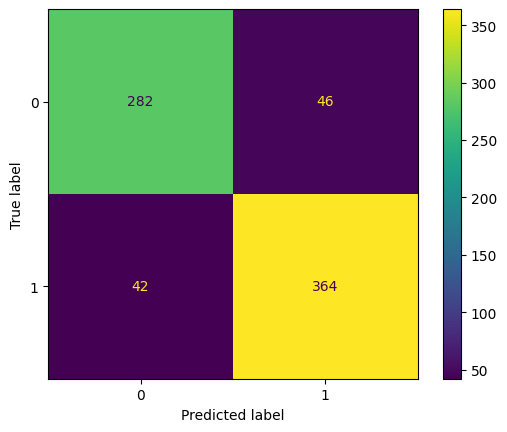

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       328
           1       0.89      0.90      0.89       406

    accuracy                           0.88       734
   macro avg       0.88      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734

ROC AUC: 0.88

==== Avaliação no conjunto de teste ====


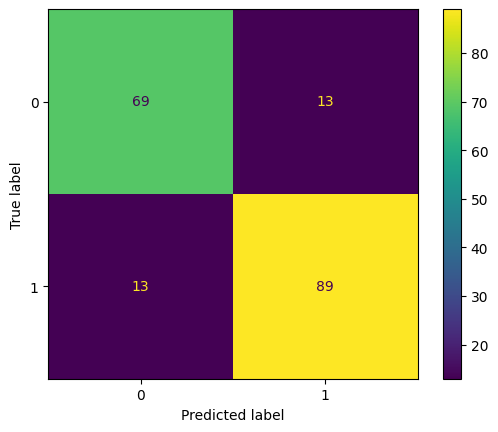

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC: 0.86


In [ ]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_knn_class.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))
print(f"ROC AUC: {roc_auc_score(y_train, y_pred_train):.2f}")

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_knn_class.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.2f}")

In [ ]:
dfm = pd.DataFrame([['K-Nearest Neighbor',
                    precision_score(y_test, y_pred_test),
                    accuracy_score(y_test, y_pred_test),
                    recall_score(y_test, y_pred_test),
                    f1_score(y_test, y_pred_test),
                    roc_auc_score(y_test, y_pred_test)]], columns=['Model', 'Precision', 'Accuracy', 'Recall', 'F1 Score', 'ROC AUC'])

dfr = dfr.append(dfm)

### Decision Tree

#### Otimização de hiperparâmetros do modelo

In [ ]:
# Definição do estimador
dt = DecisionTreeClassifier()

# Definição dos parâmetros que vamos tentar otimizar
params_grid_dt = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": range(2,11)}

# Criação da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 4)

# Objeto do grid
grid_dt = GridSearchCV(estimator = dt,
                      param_grid = params_grid_dt,
                      scoring = "f1",
                      cv = splitter,
                      verbose = 10)

In [ ]:
grid_dt

GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=10)

In [ ]:
grid_dt.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10; 1/36] START criterion=gini, max_depth=2, splitter=best................
[CV 1/10; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/10; 1/36] START criterion=gini, max_depth=2, splitter=best................
[CV 2/10; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.769 total time=   0.0s
[CV 3/10; 1/36] START criterion=gini, max_depth=2, splitter=best................
[CV 3/10; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.945 total time=   0.0s
[CV 4/10; 1/36] START criterion=gini, max_depth=2, splitter=best................
[CV 4/10; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.833 total time=   0.0s
[CV 5/10; 1/36] START criterion=gini, max_depth=2, splitter=best................
[CV 5/10; 1/36] END criterion=gini, max_depth=2, splitter=best;, score=0.882 total time=   0.0s
[CV 6/10; 1/36] START criterion=gini, max_depth=2, s

GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=10)

In [ ]:
# Melhores parâmetros para otimizar a métrica "f1" do modelo
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [ ]:
# Melhor métrica "f1" obtida com a combinação de parâmetros da célula anterior
grid_dt.best_score_

0.8847856312628777

==== Avaliação no conjunto de treinamento ====


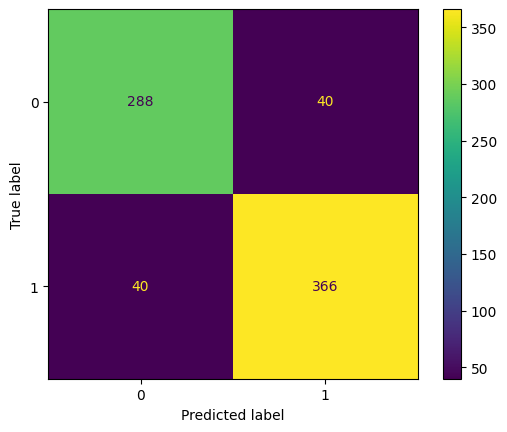

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       328
           1       0.90      0.90      0.90       406

    accuracy                           0.89       734
   macro avg       0.89      0.89      0.89       734
weighted avg       0.89      0.89      0.89       734

ROC AUC: 0.89

==== Avaliação no conjunto de teste ====


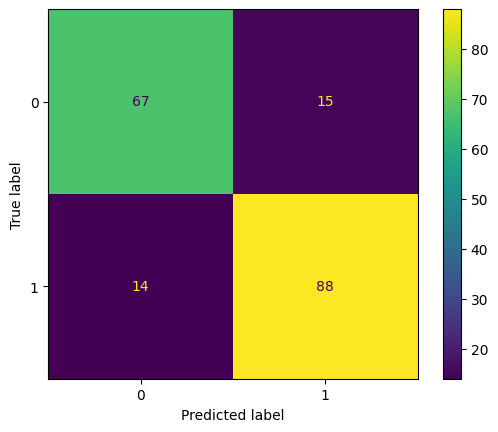

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        82
           1       0.85      0.86      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

ROC AUC: 0.84


In [ ]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_dt.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))
print(f"ROC AUC: {roc_auc_score(y_train, y_pred_train):.2f}")

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_dt.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.2f}")

In [ ]:
dfm = pd.DataFrame([['Decision Tree',
                    precision_score(y_test, y_pred_test),
                    accuracy_score(y_test, y_pred_test),
                    recall_score(y_test, y_pred_test),
                    f1_score(y_test, y_pred_test),
                    roc_auc_score(y_test, y_pred_test)]], columns=['Model', 'Precision', 'Accuracy', 'Recall', 'F1 Score', 'ROC AUC'])

dfr = dfr.append(dfm)

### Random Forest

In [ ]:
# Tratamento de Features Numéricas
etapas_tratamento_num = [("Normalização", StandardScaler())]
pipe_features_num = Pipeline(etapas_tratamento_num)

features_num = X_train.select_dtypes(include = np.number).columns.tolist() # Seleção de dados numéricos

# Tratamento de Features Categóricas
etapas_tratamento_cat = [("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")),
                        ("onehot", OneHotEncoder())]
pipe_features_cat = Pipeline(etapas_tratamento_cat)
features_cat = X_train.select_dtypes(exclude = np.number).columns.tolist() # Seleção de dados categóricos

# Aplicação de Transformações nas Colunas
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                    ("transf_cat", pipe_features_cat, features_cat)])

# Pipeline Final
pipe_rf = Pipeline([("pre_processamento", pre_processador),
                   ("RandomForest", RandomForestClassifier(n_estimators = 5000, max_depth = 5, random_state = 4, class_weight='balanced'))])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('Normalização',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak', 'Sex_F',
                                                   'Sex_M', 'ChestPainType_ASY',
                                                   'ChestPainType_ATA',
                                                   'ChestPainType_NAP',
                                                   'ChestPainType_TA',
                                                   'RestingECG_LVH',
                                                   'RestingECG_Normal',
                                                   'RestingECG_ST',
                                                   'ExerciseAngina_N',
                                                   'ExerciseAngina_Y',
                                                   'ST_Slope_Down',
                                                   'ST_Slope_Flat',
                                                   'ST_Slope_Up']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('RandomForest',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=5000, random_state=4))])

==== Avaliação no conjunto de treinamento ====


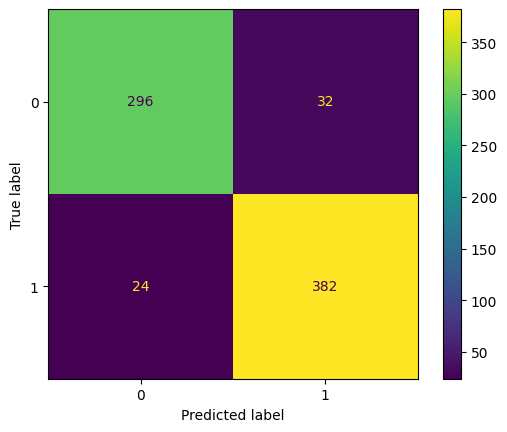

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       328
           1       0.92      0.94      0.93       406

    accuracy                           0.92       734
   macro avg       0.92      0.92      0.92       734
weighted avg       0.92      0.92      0.92       734

ROC AUC: 0.92

==== Avaliação no conjunto de teste ====


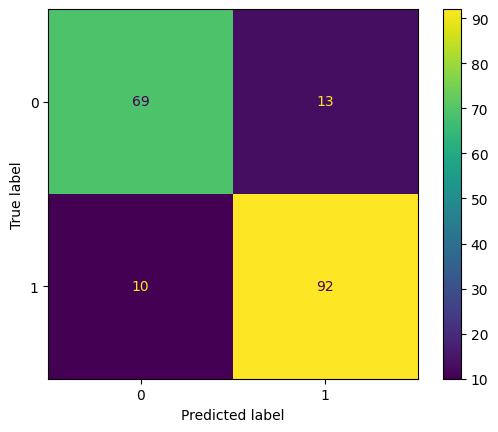

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

ROC AUC: 0.87


In [ ]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = pipe_rf.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))
print(f"ROC AUC: {roc_auc_score(y_train, y_pred_train):.2f}")

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = pipe_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.2f}")

Ajuste fino de hiperparâmetros do Random Forest com GridSearch

In [ ]:
# Definiçao dos estimadores
params_grid = {"RandomForest__n_estimators": [100, 1000, 10000]}

# Definição do Grid para Random Forest
grid_rf = GridSearchCV(estimator = pipe_rf,
                       param_grid = params_grid,
                       scoring = 'f1',
                       verbose = 10)

# Fit do modelo
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START RandomForest__n_estimators=100..............................
[CV 1/5; 1/3] END RandomForest__n_estimators=100;, score=0.906 total time=   0.2s
[CV 2/5; 1/3] START RandomForest__n_estimators=100..............................
[CV 2/5; 1/3] END RandomForest__n_estimators=100;, score=0.880 total time=   0.2s
[CV 3/5; 1/3] START RandomForest__n_estimators=100..............................
[CV 3/5; 1/3] END RandomForest__n_estimators=100;, score=0.922 total time=   0.2s
[CV 4/5; 1/3] START RandomForest__n_estimators=100..............................
[CV 4/5; 1/3] END RandomForest__n_estimators=100;, score=0.855 total time=   0.2s
[CV 5/5; 1/3] START RandomForest__n_estimators=100..............................
[CV 5/5; 1/3] END RandomForest__n_estimators=100;, score=0.873 total time=   0.2s
[CV 1/5; 2/3] START RandomForest__n_estimators=1000.............................
[CV 1/5; 2/3] END RandomForest__n_estimators

GridSearchCV(estimator=Pipeline(steps=[('pre_processamento',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('Normalização',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak',
                                                                          'Sex_F',
                                                                          'Sex_M',
                                                                          'ChestPainType_ASY',
                                                                          'ChestPainType_ATA',
                                                                          'ChestPainType_NAP',
                                                                          'ChestPainType_TA',
                                                                          'RestingECG_LVH',
                                                                          'RestingECG_Norma...
                                                                          'ST_Slope_Flat',
                                                                          'ST_Slope_Up']),
                                                                        ('transf_cat',
                                                                         Pipeline(steps=[('input_cat',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         [])])),
                                       ('RandomForest',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=5,
                                                               n_estimators=5000,
                                                               random_state=4))]),
             param_grid={'RandomForest__n_estimators': [100, 1000, 10000]},
             scoring='f1', verbose=10)

In [ ]:
grid_rf.best_params_

{'RandomForest__n_estimators': 10000}

In [ ]:
grid_rf.best_score_

0.8949721429140849

==== Avaliação no conjunto de treinamento ====


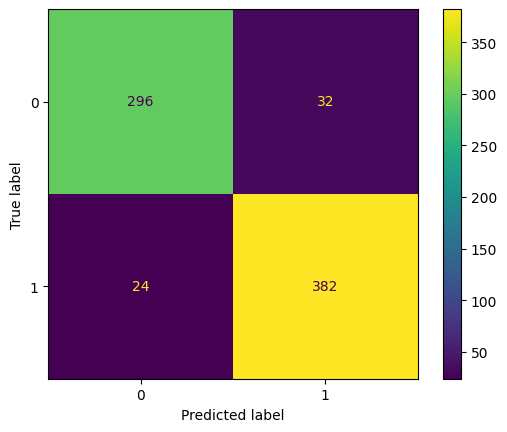

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       328
           1       0.92      0.94      0.93       406

    accuracy                           0.92       734
   macro avg       0.92      0.92      0.92       734
weighted avg       0.92      0.92      0.92       734

ROC AUC: 0.92

==== Avaliação no conjunto de teste ====


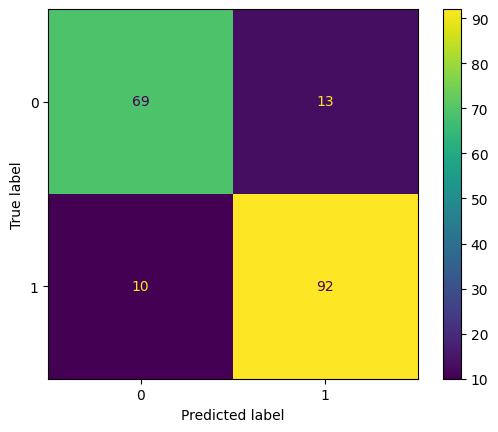

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

ROC AUC: 0.87


In [ ]:
# Avaliação no conjunto de treinamento
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = pipe_rf.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))
print(f"ROC AUC: {roc_auc_score(y_train, y_pred_train):.2f}")

# Avaliação no conjunto de teste
print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = pipe_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.2f}")

In [ ]:
dfm = pd.DataFrame([['Random Forest',
                    precision_score(y_test, y_pred_test),
                    accuracy_score(y_test, y_pred_test),
                    recall_score(y_test, y_pred_test),
                    f1_score(y_test, y_pred_test),
                    roc_auc_score(y_test, y_pred_test)]], columns=['Model', 'Precision', 'Accuracy', 'Recall', 'F1 Score', 'ROC AUC'])

dfr = dfr.append(dfm)

### Comparação entre Modelos

In [ ]:
dfr.set_index('Model')

,Precision,Accuracy,Recall,F1 Score,ROC AUC
Model,,,,,
K-Nearest Neighbor,0.87,0.86,0.87,0.87,0.86
Decision Tree,0.85,0.84,0.86,0.86,0.84
Random Forest,0.88,0.88,0.90,0.89,0.87


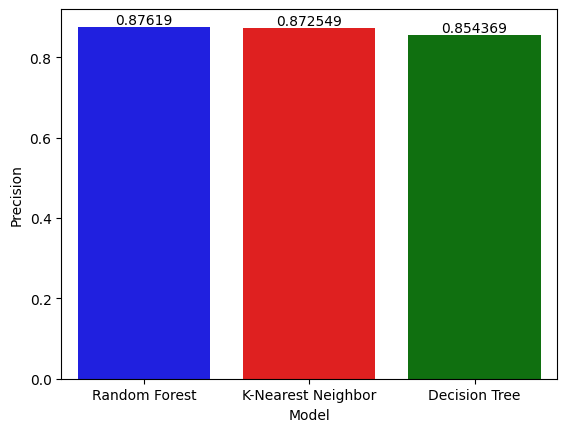

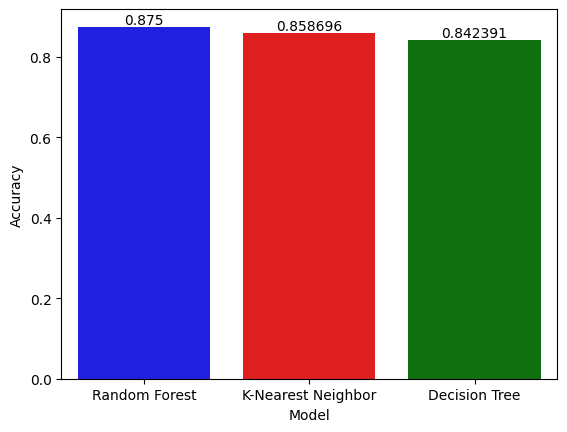

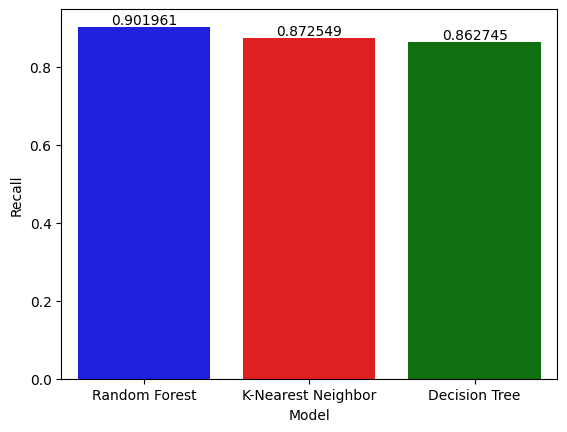

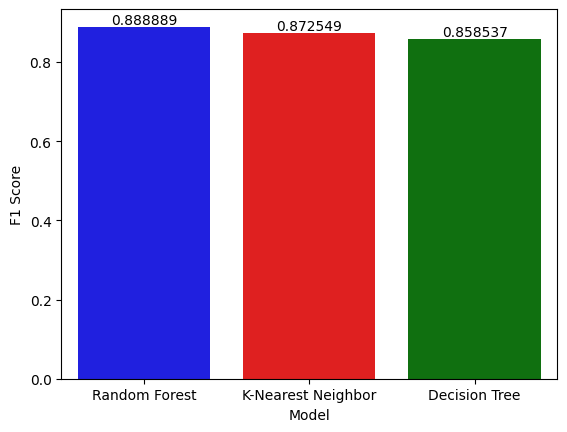

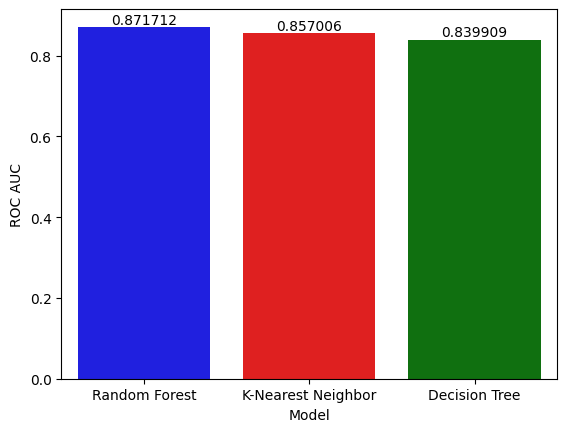

In [ ]:
dfr['Colors'] = ['red', 'green', 'blue']

for column in dfr.columns[1:-1]:
  plt.figure(column)
  dfr = dfr.sort_values(by=column, ascending=False)
  ax=sns.barplot(y=column, x='Model', data=dfr, palette = dfr['Colors'])
  ax.bar_label(ax.containers[0])

## 4. Conclusões

Neste trabalho de análise e modelagem preditiva de insuficiência cardíaca, realizamos uma exploração detalhada do conjunto de dados, identificando padrões e relacionamentos importantes entre as variáveis. A partir da análise exploratória, observamos que fatores como idade, máximo de batimentos cardíacos atingidos, depressão do segmento ST e tipo de dor no peito (entre outros) têm uma forte influência na ocorrência de insuficiência cardíaca.

Na fase de modelagem, optamos por utilizar três algoritmos diferentes para prever a presença ou ausência de insuficiência cardíaca e observar a precisão de cada um. Foram eles: K-Nearest Neighbors (KNN), Random forest e Decision Tree. Utilizamos técnicas de otimização, como Grid Search com validação cruzada, para encontrar os melhores hiperparâmetros para o modelo. Após treinar os modelos, avaliamos seus reséctivos desempenhos utilizando diversas métricas de classificação, incluindo precisão, recall, acurácia e roc auc.

Os modelos foram capaz de capturar padrões nos dados de forma eficaz. No entanto, é importante notar que, para aplicar esses modelo em um cenário do mundo real, seria essencial considerar outras métricas de avaliação relevantes para o contexto específico, como sensibilidade, especificidade ou valores preditivos positivos e negativos, dependendo dos custos associados a falsos positivos e falsos negativos.

Além disso, ao usar modelos preditivos em um ambiente clínico ou de saúde, é crucial envolver profissionais da área para garantir que o modelo seja interpretável e confiável. A interpretabilidade é essencial para que os médicos e profissionais de saúde possam entender as decisões do modelo e confiar nelas para fornecer o melhor atendimento ao paciente.

Em resumo, este trabalho forneceu insights valiosos sobre os fatores que podem influenciar a insuficiência cardíaca e desenvolveu um modelo preditivo sólido. No entanto, recomenda-se uma validação adicional dos modelos em dados independentes e a colaboração com especialistas da área de saúde para garantir que o modelo seja clinicamente relevante e seguro para implementação em um ambiente de assistência médica real.